# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post]() by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
import pandas as pd
#import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Data

The dataset contains both information on marketing newsletters/e-mail campaigns (e-mail offers sent) and transaction level data from customers (which offer customers responded to and what they bought).

In [4]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [5]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

**Your turn:** Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):

* customer_name
* One column for each offer, with a 1 if the customer responded to the offer

In [6]:
dft =df_transactions.copy()

In [7]:
type(dft)

pandas.core.frame.DataFrame

In [8]:
dft2=dft.pivot(index='customer_name',columns='offer_id',values='n').fillna(0).reset_index()
dft2.head()

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
dft2.shape

(100, 33)

## K-Means Clustering

**Your turn:** 

* Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
* Apply the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. Use `n_clusters=5` (but feel free to play with this)
* Print the number of points in each cluster 

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [15]:
xcols=dft2.iloc[:,1:].values
kmeans=KMeans(n_clusters=5)
pred=kmeans.fit_predict(xcols)

In [16]:
pred

array([2, 1, 0, 2, 1, 4, 0, 2, 4, 2, 4, 0, 2, 3, 1, 0, 3, 0, 2, 4, 2, 1, 4,
       4, 0, 4, 1, 1, 1, 1, 1, 2, 4, 4, 1, 2, 4, 2, 4, 2, 0, 0, 1, 3, 2, 3,
       2, 1, 1, 1, 1, 4, 1, 0, 4, 2, 0, 1, 2, 3, 1, 1, 1, 2, 2, 0, 0, 1, 4,
       1, 1, 1, 4, 1, 1, 1, 0, 4, 1, 0, 3, 3, 3, 0, 2, 2, 2, 3, 1, 1, 3, 2,
       3, 1, 4, 4, 2, 1, 3, 4], dtype=int32)

## Visualizing clusters using PCA

How do we visualize clusters? Principal Component Analysis (PCA) will help. There are lots of uses for PCA, but today we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset. Why you ask? Well once it is in 2 dimensions (or simply put, it has 2 columns), it becomes much easier to plot!

**Your turn:** Use PCA to plot your clusters:

* Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
* Create a data frame with the following fields:
  * customer name
  * cluster id the customer belongs to
  * the two PCA components (label them `x` and `y`)

In [17]:
#your turn   NOTE: I have labeled the PCA axes pca1 and pca2 instead of x and y
pca=PCA(n_components=2).fit_transform(xcols)
pcadf=pd.DataFrame(pca,columns=[['pca1','pca2']])
new1=pcadf.merge(dft2.iloc[:,0:2],left_index=True,right_index=True)
new2=new1.drop(1,axis=1)
new2.loc[:,'clusters']=pd.Series(pred)
new2.head()

,pca1,pca2,customer_name,clusters
0,-1.007580,0.108215,Adams,2
1,0.287539,0.044715,Allen,1
2,0.392032,1.038391,Anderson,0
3,-0.699477,-0.022542,Bailey,2
4,-0.088183,-0.471695,Baker,1


What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We'll color code each point based on it's cluster so it's easier to see them.

**Your turn:**

* Plot a scatterplot of the `x` vs `y` columns
* Color-code points differently based on cluster ID

How do the clusters look?

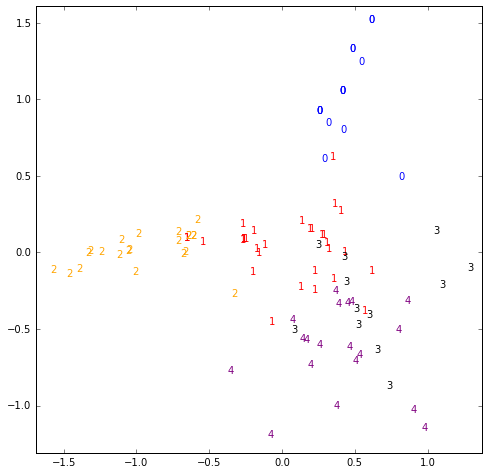

In [18]:
#your turn
fig=plt.figure(figsize=(8,8),facecolor='white')
ax=fig.add_subplot(1,1,1)
ax.set_xlim([min(new2.pca1)-0.1,max(new2.pca1)+0.1])
ax.set_ylim([min(new2.pca2)-0.1,max(new2.pca2)+0.1])

clus1=zip(new2.pca1[new2.clusters==0],new2.pca2[new2.clusters==0],'0'*sum(new2.clusters==0))
for x,y,label in clus1:
    ax.annotate(label,xy=(x,y),color='blue')
    
clus2=zip(new2.pca1[new2.clusters==1],new2.pca2[new2.clusters==1],'1'*sum(new2.clusters==1))
for x,y,label in clus2:
    ax.annotate(label,xy=(x,y),color='red')
    
clus3=zip(new2.pca1[new2.clusters==2],new2.pca2[new2.clusters==2],'2'*sum(new2.clusters==2))
for x,y,label in clus3:
    ax.annotate(label,xy=(x,y),color='orange')
        
clus4=zip(new2.pca1[new2.clusters==3],new2.pca2[new2.clusters==3],'3'*sum(new2.clusters==3))
for x,y,label in clus4:
    ax.annotate(label,xy=(x,y),color='black')
    
clus5=zip(new2.pca1[new2.clusters==4],new2.pca2[new2.clusters==4],'4'*sum(new2.clusters==4))
for x,y,label in clus5:
    ax.annotate(label,xy=(x,y),color='purple')   
    
plt.show()

## This doesn't look to bad.  Two groups seem well separated from the rest, 0 and 2. The other groups do not separate well on these axes.  Checking against the third PCA axis would be a possibility.  One could ask if the variation explained by the first two PCA axes justifies making an evaluation based solely on these two axes.  Also, the result does not seem completely stable.  Running the script again produces a different clustering.

**Your turn (extra credit):** Play with the following: 

* Different initializations for `KMeans`
* Other clustering algorithms in scikit-learn

## I notice that running the above script repeatedly results in different clusterings. Perhaps k=4 is more stable

In [19]:
xcols=dft2.iloc[:,1:].values
kmeans=KMeans(n_clusters=4)
pred=kmeans.fit_predict(xcols)

In [20]:
pca=PCA(n_components=2).fit_transform(xcols)
pcadf=pd.DataFrame(pca,columns=[['pca1','pca2']])
new1=pcadf.merge(dft2.iloc[:,0:2],left_index=True,right_index=True)
new2=new1.drop(1,axis=1)
new2.loc[:,'clusters']=pd.Series(pred)
new2.head()

,pca1,pca2,customer_name,clusters
0,-1.007580,0.108215,Adams,3
1,0.287539,0.044715,Allen,1
2,0.392032,1.038391,Anderson,0
3,-0.699477,-0.022542,Bailey,3
4,-0.088183,-0.471695,Baker,2


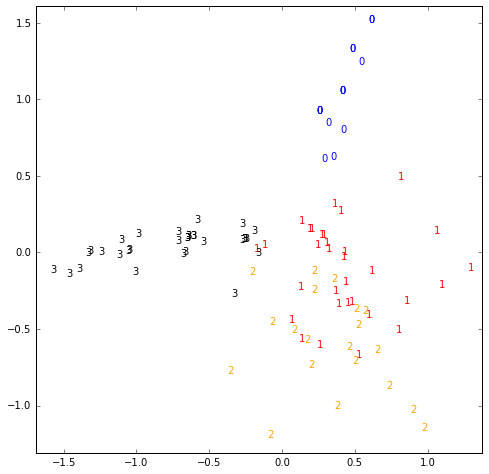

In [21]:
#your turn
fig=plt.figure(figsize=(8,8),facecolor='white')
ax=fig.add_subplot(1,1,1)
ax.set_xlim([min(new2.pca1)-0.1,max(new2.pca1)+0.1])
ax.set_ylim([min(new2.pca2)-0.1,max(new2.pca2)+0.1])

clus1=zip(new2.pca1[new2.clusters==0],new2.pca2[new2.clusters==0],'0'*sum(new2.clusters==0))
for x,y,label in clus1:
    ax.annotate(label,xy=(x,y),color='blue')
    
clus2=zip(new2.pca1[new2.clusters==1],new2.pca2[new2.clusters==1],'1'*sum(new2.clusters==1))
for x,y,label in clus2:
    ax.annotate(label,xy=(x,y),color='red')
    
clus3=zip(new2.pca1[new2.clusters==2],new2.pca2[new2.clusters==2],'2'*sum(new2.clusters==2))
for x,y,label in clus3:
    ax.annotate(label,xy=(x,y),color='orange')
        
clus4=zip(new2.pca1[new2.clusters==3],new2.pca2[new2.clusters==3],'3'*sum(new2.clusters==3))
for x,y,label in clus4:
    ax.annotate(label,xy=(x,y),color='black')
    
#clus5=zip(new2.pca1[new2.clusters==4],new2.pca2[new2.clusters==4],'4'*sum(new2.clusters==4))
#for x,y,label in clus5:
#    ax.annotate(label,xy=(x,y),color='purple')   
    
plt.show()

## This does not appear much better.  However, confusion appears to be restricted to groups 1 and 2.  Groups 0 and 3 are well differentiated from each other and from (1,2).  Of course, one could continue to explore this in detail. But time is now tight to finish, so I'm going to have to leave that for another time.